<a href="https://colab.research.google.com/github/rafi0486/Android-ui-templates/blob/master/Chatbot_2%20error%20half.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

def pprint(o):
    # small helper to make dict dumps a bit prettier
    print(json.dumps(o, indent=2))

####Install Rasa NLU and Rasa Core.

In [2]:
import sys
python = sys.executable

# In your environment run:
!{python} -m pip install -U rasa_core==0.9.6 rasa_nlu[spacy]===0.12.3;
!{python} -m pip install MySQL-python;
!{python} -m  pip install MySQL-python-connector;

# as well as install a language model:
!{python} -m spacy download en_core_web_md
!{python} -m spacy link en_core_web_md en --force;
!pip install mysql-connector-python




     |████████████████████████████████| 133kB 3.5MB/s 
     |████████████████████████████████| 133kB 35.1MB/s 
     |████████████████████████████████| 4.9MB 39.6MB/s 
     |████████████████████████████████| 71kB 25.0MB/s 
     |████████████████████████████████| 1.0MB 34.5MB/s 
     |████████████████████████████████| 61kB 23.3MB/s 
     |████████████████████████████████| 51kB 22.7MB/s 
     |████████████████████████████████| 71kB 26.4MB/s 
     |████████████████████████████████| 49.1MB 35.0MB/s 
     |████████████████████████████████| 665kB 40.3MB/s 
     |████████████████████████████████| 307kB 42.2MB/s 
     |████████████████████████████████| 122kB 40.6MB/s 
     |████████████████████████████████| 81kB 23.5MB/s 
     |████████████████████████████████| 81kB 25.1MB/s 
     |████████████████████████████████| 3.1MB 29.4MB/s 
     |████████████████████████████████| 204kB 48.4MB/s 
     |████████████████████████████████| 3.1MB 33.7MB/s 
     |████████████████████████████████| 174kB 39.5MB/s

In [3]:
import rasa_nlu
import rasa_core
import spacy

print("rasa_nlu: {} rasa_core: {}".format(rasa_nlu.__version__, rasa_core.__version__))
print("Loading spaCy language model...")
print(spacy.load("en")("Hello world!"))

rasa_nlu: 0.12.3 rasa_core: 0.9.6
Loading spaCy language model...
Hello world!


####Install some graph packages. You can jump this step if you have already installed it on your PC.

In [4]:
!apt-get -qq install -y graphviz libgraphviz-dev pkg-config;
!breq install graphviz
!{python} -m pip install pygraphviz;

Selecting previously unselected package libgtk2.0-common.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../0-libgtk2.0-common_2.24.32-1ubuntu1_all.deb ...
Unpacking libgtk2.0-common (2.24.32-1ubuntu1) ...
Selecting previously unselected package libgtk2.0-0:amd64.
Preparing to unpack .../1-libgtk2.0-0_2.24.32-1ubuntu1_amd64.deb ...
Unpacking libgtk2.0-0:amd64 (2.24.32-1ubuntu1) ...
Selecting previously unselected package libgail18:amd64.
Preparing to unpack .../2-libgail18_2.24.32-1ubuntu1_amd64.deb ...
Unpacking libgail18:amd64 (2.24.32-1ubuntu1) ...
Selecting previously unselected package libgail-common:amd64.
Preparing to unpack .../3-libgail-common_2.24.32-1ubuntu1_amd64.deb ...
Unpacking libgail-common:amd64 (2.24.32-1ubuntu1) ...
Selecting previously unselected package libxdot4.
Preparing to unpack .../4-libxdot4_2.40.1-2_amd64.deb ...
Unpacking libxdot4 (2.40.1-2) ...
Selecting previously unselected package libgvc6-plugins-gtk.
Prep

## Part 1: Natural Language Understanding

Here some examples of the conversation with sentences from the user and exploited to build Rasa NLU model.  

### Creating the training data for language understanding model

In this step is originated a train set grouping user inputs into intents and highlighting key word by entities with its synonyms (entity values).  

In [5]:
nlu_md = """
## intent:greet
- hey
- hello there
- hi
- hello
- good morning
- good evening
- hey there
- let's go
- hey dude
- goodmorning
- goodevening
- good afternoon
- start
## intent:affirm
- great
- OK
- okay
- thank you
- thanks
- yes, thanks
- cheers
- thanks a lot
- thank you very much

## intent: health_about
- Please tell me about [health department](HealthInsurance),
- Please tell me the [health insurance](HealthInsurance) Plans for family
- What is [health insurance](HealthInsurance)
- For how many year's [health insurance](HealthInsurance) is covered
- Please tell me about [abc health insurance](HealthInsurance)
- Please tell me the [abc health insurance](HealthInsurance) Plans for family
- What is [abc health insurance](HealthInsurance)
- For how many year's [abc health insurance](HealthInsurance) is covered
- How to renew my [health insurance](HealthInsurance)
- What is [health insurance](HealthInsurance)
- I would like to know more about [health insurance](HealthInsurance)
- Please tell something about [health insurance](HealthInsurance)
- What is meant by [health insurance](HealthInsurance)
- Explain about [health insurance](HealthInsurance)
- Give me the details of [health insurance](HealthInsurance)
- Tell me about [health insurance](HealthInsurance)
- Please tell about [health insurance](HealthInsurance)
- How to renew my [abc health insurance](HealthInsurance)
- What is [abc health insurance](HealthInsurance)
- I would like to know more about [abc health insurance](HealthInsurance)
- Please tell something about [abc health insurance](HealthInsurance)
- What is meant by [abc health insurance](HealthInsurance)
- Explain about [abc health insurance](HealthInsurance)
- Give me the details of [abc health insurance](HealthInsurance)
- Tell me about [abc health insurance](HealthInsurance)
- Please tell about [abc health insurance](HealthInsurance)

## intent: vehicle_about
- How to renew my [abc vehicle insurance](VehicleInsurance)
- What is [abc vehicle insurance](VehicleInsurance)
- I would like to know more about [abc vehicle insurance](VehicleInsurance)
- Please tell something about [abc vehicle insurance](VehicleInsurance)
- What is meant by [abc vehicle insurance](VehicleInsurance)
- Explain about [abc vehicle insurance](VehicleInsurance)
- Give me the details of [abc vehicle insurance](VehicleInsurance)
- Tell me about [abc vehicle insurance](VehicleInsurance)
- Please tell about [abc vehicle insurance](VehicleInsurance)
- How to renew my [vehicle insurance](VehicleInsurance)
- What is [vehicle insurance](VehicleInsurance)
- I would like to know more about [vehicle insurance](VehicleInsurance)
- Please tell something about [vehicle insurance](VehicleInsurance)
- What is meant by [vehicle insurance](VehicleInsurance)
- Explain about [vehicle insurance](VehicleInsurance)
- Give me the details of [vehicle insurance](VehicleInsurance)
- Tell me about [vehicle insurance](VehicleInsurance)
- Please tell about [vehicle insurance](VehicleInsurance)


## intent: vehicle_benefits
- What are the [vehicle insurance](VehicleInsurance) [benefits](Benefits)?
- Are there any [vehicle insurance](VehicleInsurance) benefits?
- Tell me about the [benefits](Benefits) of  [vehicle insurance](VehicleInsurance)?
- What do you know about [vehicle insurance](VehicleInsurance) [benefits](Benefits)?
- What are the [benefits](Benefits) of taking ABC [vehicle insurance](VehicleInsurance)?
- What are the [benefits](Benefits) over other [vehicle insurance](VehicleInsurance) companies?
- What are the [abc vehicle insurance](VehicleInsurance) [benefits](Benefits)?
- Are there any [abc vehicle insurance](VehicleInsurance) [benefits](Benefits)?
- Tell me about the benifits of  [abc vehicle insurance](VehicleInsurance)?
- What do you know about [abc vehicle insurance](VehicleInsurance) [benefits](Benefits)?
- What are the [benefits](Benefits) of taking ABC [abc vehicle insurance](VehicleInsurance)?
- What are the [benefits](Benefits) over other [abc vehicle insurance](VehicleInsurance) companies?
- What are the [vehicle insurance](VehicleInsurance) [tax benefits](Benefits)?
- Are there any [vehicle insurance](VehicleInsurance) tax benefits?
- Tell me about the [tax benefits](Benefits) of  [vehicle insurance](VehicleInsurance)?
- What do you know about [vehicle insurance](VehicleInsurance) [tax benefits](Benefits)?
- What are the [tax benefits](Benefits) of taking ABC [vehicle insurance](VehicleInsurance)?
- What are the [tax benefits](Benefits) over other [vehicle insurance](VehicleInsurance) companies?
- What are the [abc vehicle insurance](VehicleInsurance) [tax benefits](Benefits)?
- Are there any [abc vehicle insurance](VehicleInsurance) [tax benefits](Benefits)?
- Tell me about the benifits of  [abc vehicle insurance](VehicleInsurance)?
- What do you know about [abc vehicle insurance](VehicleInsurance) [tax benefits](Benefits)?
- What are the [tax benefits](Benefits) of taking ABC [abc vehicle insurance](VehicleInsurance)?
- What are the [tax benefits](Benefits) over other [abc vehicle insurance](VehicleInsurance) companies?
- What are the [vehicle insurance](VehicleInsurance) [regular benefits benefits](Benefits)?
- Are there any [vehicle insurance](VehicleInsurance) regular benefits benefits?
- Tell me about the [regular benefits benefits](Benefits) of  [vehicle insurance](VehicleInsurance)?
- What do you know about [vehicle insurance](VehicleInsurance) [regular benefits benefits](Benefits)?
- What are the [regular benefits benefits](Benefits) of taking ABC [vehicle insurance](VehicleInsurance)?
- What are the [regular benefits benefits](Benefits) over other [vehicle insurance](VehicleInsurance) companies?
- What are the [abc vehicle insurance](VehicleInsurance) [regular benefits benefits](Benefits)?
- Are there any [abc vehicle insurance](VehicleInsurance) [regular benefits benefits](Benefits)?
- Tell me about the benifits of  [abc vehicle insurance](VehicleInsurance)?
- What do you know about [abc vehicle insurance](VehicleInsurance) [regular benefits benefits](Benefits)?
- What are the [regular benefits benefits](Benefits) of taking ABC [abc vehicle insurance](VehicleInsurance)?
- What are the [regular benefits benefits](Benefits) over other [abc vehicle insurance](VehicleInsurance) companies?



## intent: health_benefits
- What are the [health insurance](HealthInsurance) [benefits](Benefits)?
- Are there any [health insurance](HealthInsurance) [benefits](Benefits)?
- Tell me about the [benefits](Benefits) of  [health insurance](HealthInsurance)?
- What do you know about [health insurance](HealthInsurance) [benefits](Benefits)?
- What are the [benefits](Benefits) of taking ABC [health insurance](HealthInsurance)?
- What are the [benefits](Benefits) over other [health insurance](HealthInsurance) companies?
- What are the [abc health insurance](HealthInsurance) [benefits](Benefits)?
- Are there any [abc health insurance](HealthInsurance) [benefits](Benefits)?
- Tell me about the [benefits](Benefits) of  [abc health insurance](HealthInsurance)?
- What do you know about [abc health insurance](HealthInsurance) [benefits](Benefits)?
- What are the [benefits](Benefits) of taking ABC [abc health insurance](HealthInsurance)?
- What are the [benefits](Benefits) over other [abc health insurance](HealthInsurance) companies?
- What are the [health insurance](HealthInsurance) [regular benefits](Benefits)?
- Are there any [health insurance](HealthInsurance) [regular benefits](Benefits)?
- Tell me about the [regular benefits](Benefits) of  [health insurance](HealthInsurance)?
- What do you know about [health insurance](HealthInsurance) [regular benefits](Benefits)?
- What are the [regular benefits](Benefits) of taking ABC [health insurance](HealthInsurance)?
- What are the [regular benefits](Benefits) over other [health insurance](HealthInsurance) companies?
- What are the [abc health insurance](HealthInsurance) [regular benefits](Benefits)?
- Are there any [abc health insurance](HealthInsurance) [regular benefits](Benefits)?
- Tell me about the [regular benefits](Benefits) of  [abc health insurance](HealthInsurance)?
- What do you know about [abc health insurance](HealthInsurance) [regular benefits](Benefits)?
- What are the [regular benefits](Benefits) of taking ABC [abc health insurance](HealthInsurance)?
- What are the [regular benefits](Benefits) over other [abc health insurance](HealthInsurance) companies?
- What are the [health insurance](HealthInsurance) [complementary benefits](Benefits)?
- Are there any [health insurance](HealthInsurance) [complementary benefits](Benefits)?
- Tell me about the [complementary benefits](Benefits) of  [health insurance](HealthInsurance)?
- What do you know about [health insurance](HealthInsurance) [complementary benefits](Benefits)?
- What are the [complementary benefits](Benefits) of taking ABC [health insurance](HealthInsurance)?
- What are the [complementary benefits](Benefits) over other [health insurance](HealthInsurance) companies?
- What are the [abc health insurance](HealthInsurance) [complementary benefits](Benefits)?
- Are there any [abc health insurance](HealthInsurance) [complementary benefits](Benefits)?
- Tell me about the [complementary benefits](Benefits) of  [abc health insurance](HealthInsurance)?
- What do you know about [abc health insurance](HealthInsurance) [complementary benefits](Benefits)?
- What are the [complementary benefits](Benefits) of taking ABC [abc health insurance](HealthInsurance)?
- What are the [complementary benefits](Benefits) over other [abc health insurance](HealthInsurance) companies?


## intent: health_timeperiod
- What is the [validity](TimePeriod) of [abc health insurance](HealthInsurance)?
- What is the [duration](TimePeriod) of [abc health insurance](HealthInsurance)?
- How [long](TimePeriod)  is the [abc health insurance](HealthInsurance) valid?
- What is the [validity](TimePeriod) of [health insurance](HealthInsurance)?
- What is the [duration](TimePeriod) of [health insurance](HealthInsurance)?
- How [long](TimePeriod)  is the [health insurance](HealthInsurance) valid?
- What is the [validity](TimePeriod) of [health insurance](HealthInsurance)?
- What is the [duration](TimePeriod) of [health insurance](HealthInsurance)?
- How [long](TimePeriod)  is the [health insurance](HealthInsurance) valid?
- What is the [validity](TimePeriod) of [abc health insurance](HealthInsurance)?
- What is the [duration](TimePeriod) of [abc health insurance](HealthInsurance)?
- How [long](TimePeriod)  is the [abc health insurance](HealthInsurance) valid?


## intent: vehicle_timeperiod
- What is the [validity](TimePeriod) of [vehicle insurance](VehicleInsurance)?
- What is the [duration](TimePeriod) of [vehicle insurance](VehicleInsurance)?
- How [long](TimePeriod)  is the [vehicle insurance](VehicleInsurance) valid?
- What is the [validity](TimePeriod) of [abc vehicle insurance](VehicleInsurance)?
- What is the [duration](TimePeriod) of [abc vehicle insurance](VehicleInsurance)?
- How [long](TimePeriod)  is the [abc vehicle insurance](VehicleInsurance) valid?




"""

%store nlu_md > nlu.md

Writing 'nlu_md' (str) to file 'nlu.md'.


### Defining the NLU model

With the training dataset is possible to build the NLU model by a pipeline which defines how structured data is extracted from unstructured user inputs. 

In [26]:
config = """
language: "en"
policies:
  - name: "KerasPolicy"
    featurizer:
    - name: MaxHistoryTrackerFeaturizer
      max_history: 5
      state_featurizer:
        - name: BinarySingleStateFeaturizer
  - name: "MemoizationPolicy"
    max_history: 5
pipeline:
- name: "nlp_spacy"                   # loads the spacy language model
- name: "tokenizer_spacy"             # splits the sentence into tokens
- name: "ner_crf"                     # uses the pretrained spacy NER model
- name: "intent_featurizer_spacy"     # transform the sentence into a vector representation
- name: "intent_classifier_sklearn"   # uses the vector representation to classify using SVM
- name: "ner_synonyms"                # trains the synonyms


""" 

%store config > config.yml

Writing 'config' (str) to file 'config.yml'.


### Training the Rasa NLU Model

Let's start training the dataset with user inputs.

In [27]:
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

# loading the nlu training samples
training_data = load_data("nlu.md")

# trainer to educate our pipeline
trainer = Trainer(config.load("config.yml"))

# train the model!
interpreter = trainer.train(training_data)

# store it for future use
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")

INFO:rasa_nlu.training_data.loading:Training data format of nlu.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 156 (8 distinct intents)
	- Found intents: 'vehicle_timeperiod', 'health_about', 'affirm', 'health_benefits', 'greet', 'health_timeperiod', 'vehicle_about', 'vehicle_benefits'
	- entity examples: 134 (4 distinct entities)
	- found entities: 'HealthInsurance', 'TimePeriod', 'Benefits', 'VehicleInsurance'

INFO:rasa_nlu.utils.spacy_utils:Trying to load spacy model with name 'en'
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.model:Starting to train component nlp_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component tokenizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component ner_crf
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component ner_synonyms
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Successfully saved model into '/content/models/nlu/default/current'


### Using & evaluating the NLU model

Have a look on how the model is performing on a sentence:

In [8]:
pprint(interpreter.parse("What is coverage"))

{
  "intent": {
    "name": "health_timeperiod",
    "confidence": 0.28978173710187793
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "health_timeperiod",
      "confidence": 0.28978173710187793
    },
    {
      "name": "health_about",
      "confidence": 0.2890877912101407
    },
    {
      "name": "vehicle_timeperiod",
      "confidence": 0.1162166588705913
    },
    {
      "name": "vehicle_benefits",
      "confidence": 0.0857171963721443
    },
    {
      "name": "health_benefits",
      "confidence": 0.0770493010877963
    },
    {
      "name": "vehicle_about",
      "confidence": 0.0704853721455275
    },
    {
      "name": "greet",
      "confidence": 0.04222567313421367
    },
    {
      "name": "affirm",
      "confidence": 0.029436270077708472
    }
  ],
  "text": "What is coverage"
}


Evaluation of a standalone model using all the dataset without a split train-test for semplicity. Upgraded version afford the split train-test option.

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.training_data.loading:Training data format of nlu.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 156 (8 distinct intents)
	- Found intents: 'vehicle_timeperiod', 'health_about', 'affirm', 'health_benefits', 'greet', 'health_timeperiod', 'vehicle_about', 'vehicle_benefits'
	- entity examples: 134 (4 distinct entities)
	- found entities: 'HealthInsurance', 'TimePeriod', 'Benefits', 'VehicleInsurance'

INFO:rasa_nlu.evaluate:Intent evaluation results:
INFO:rasa_nlu.evaluate:Intent Evaluation: Only considering those 156 examples that have a defined intent out of 156 examples
INFO:rasa_nlu.evaluate:F1-Score:  1.0
INFO:rasa_nlu.evaluate:Precision: 1.0
INFO:rasa_nlu.evaluate:Accuracy:  1.0
INFO:rasa_nlu.evaluate:Classification report: 
                    precision    recall  f1-score   support

            affirm       1.00      1.00      1.00        

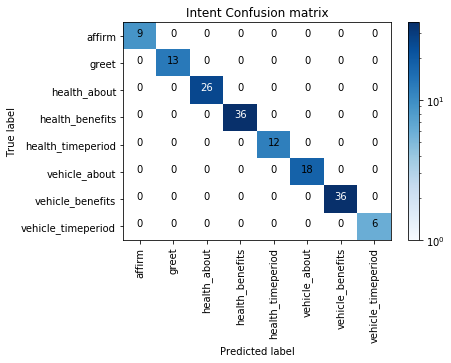

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  0.9951038409421098
INFO:rasa_nlu.evaluate:Precision: 0.9952891296667059
INFO:rasa_nlu.evaluate:Accuracy:  0.9950535861500412
INFO:rasa_nlu.evaluate:Classification report: 
                  precision    recall  f1-score   support

        Benefits       0.95      1.00      0.98       120
 HealthInsurance       1.00      1.00      1.00       185
      TimePeriod       1.00      1.00      1.00        18
VehicleInsurance       1.00      1.00      1.00       150
       no_entity       1.00      0.99      1.00       740

     avg / total       1.00      1.00      1.00      1213



In [28]:
from rasa_nlu.evaluate import run_evaluation

run_evaluation("nlu.md", model_directory)


# Part 2: Handling the dialogue

In this part at the chatbot is taught how to make responses by training a dialogue management model with Rasa Core.

### Writing Stories

The dataset used for dialogue management models are represented by 'stories': actual conversations. User inputs expressed by intents, entities and value entities, start with '*'. Chatbot responses expressed as actions, start with '-'. 

In [29]:
stories_md = """

## path 0              
* greet
  - utter_greet             
* health_about{"HealthInsurance":"health insurance"}  
  - utter_action_health_about
* affirm  
  - utter_affirm
  
## path 1             
* greet
  - utter_greet             
* health_about{"HealthInsurance":"abc health insurance"}  
  - utter_action_health_about
* affirm  
  - utter_affirm  
  
  
## path 2           
* greet
  - utter_greet             
* vehicle_about{"VehicleInsurance":"vehicle insurance"}  
  - utter_action_vehicle_about
* affirm  
  - utter_affirm
  
## path 3           
* greet
  - utter_greet             
* vehicle_benefits{"VehicleInsurance":"vehicle insurance","Benefits":"benefits"}  
  - utter_action_vehicle_benefits
* affirm  
  - utter_affirm  
  
## path 4           
* greet
  - utter_greet             
* vehicle_benefits{"VehicleInsurance":"vehicle insurance","Benefits":"tax benefits"}  
  - utter_action_vehicle_benefits
* affirm  
  - utter_affirm    
  
  
## path 5           
* greet
  - utter_greet             
* vehicle_benefits{"VehicleInsurance":"vehicle insurance","Benefits":"regular benefits"}  
  - utter_action_vehicle_benefits
* affirm  
  - utter_affirm     
  
  
## path 6         
* greet
  - utter_greet             
* health_benefits{"HealthInsurance":"health insurance","Benefits":"benefits"}  
  - utter_action_health_benefits
* affirm  
  - utter_affirm  
    
## path 7        
* greet
  - utter_greet             
* health_benefits{"HealthInsurance":"health insurance","Benefits":"regular benefits"}  
  - utter_action_health_benefits
* affirm  
  - utter_affirm 
  
## path 8      
* greet
  - utter_greet             
* health_benefits{"HealthInsurance":"health insurance","Benefits":"complementary benefits"}  
  - utter_action_health_benefits
* affirm  
  - utter_affirm  
        
    
  
## path 999       
* greet
  - utter_greet             
* vehicle_about{"VehicleInsurance":"abc vehicle insurance"}  
  - utter_action_vehicle_about
* affirm  
  - utter_affirm    
  
  

* affirm
  - utter_affirm         
"""

%store stories_md > stories.md

Writing 'stories_md' (str) to file 'stories.md'.


### Defining a Domain

In the domain is specified the architecture of the dialogue with intents, entities, actions and also templates with answers used by the chatbot to respond to the user and slots which will help the chatbot to keep track of the context.

Here some links used as references for the answers:

https://en.wikipedia.org/wiki/List_of_emergency_telephone_numbers

https://exchange.aaa.com/travel-planning/international-travel/international-clubs/#.XM2ruXUzaV4


In [42]:
domain_yml = """
intents:
- greet
- health_about
- vehicle_about
- vehicle_timeperiod
- health_timeperiod
- vehicle_benefits
- health_benefits
- affirm


slots:
  HealthInsurance:
    type: categorical
    values:
        - health insurance
        - abc health insurance
  VehicleInsurance:
    type: categorical
    values:
        - vehicle insurance
        - abc vehicle insurance         
  Benefits:
    type: categorical
    values:
        - benefits
        - tax benefits
        - regular benefits
        - complementary benefits
  TimePeriod:
    type: categorical
    values:
        - timeperiod
        - duration
        - long
        - validity


  
entities:
- HealthInsurance
- VehicleInsurance
- Benefits
- TimePeriod


actions:
- utter_greet
- utter_affirm
- utter_action_health_about
- utter_action_vehicle_about
- utter_action_vehicle_benefits
- utter_action_health_benefits
- utter_action_vehicle_timeperiod
- utter_action_health_timeperiod
- action_default
- __main__.ApiAction

templates:
  utter_greet:
  - text: "Hello, welcome to ABC Insurance Virtual Assistant. How can I assist you today?"
  utter_action_health_about:
  - text: "It is health insurance, which can be covered for all medical day-care treatments such as skin treatment and Lasik surgery. The policy covered for 5 yrs. The Free look period is 15 days, the grace period and waiting period is 30 days."
  utter_action_vehicle_about:
  - text: "It is vehicle insurance, which can be covered for all own damage treatments such as fire, theft, accident. The policy covered for 5 yrs. The Free look period is 15 days, the grace period and waiting period is 30 days."
  utter_action_vehicle_benefits:
  - text: "a. Renewal Benefits :rn i. Cumulative Bonus (Additional Sum Insured) - An Additional Sum Insured of 10% of Annual Sum Insured provided on each renewal for every claim-free year up to a maximum of 50%.rnii. Complimentary vehicle service Coupons: One coupon per individual policy and two coupons per Floater policy will be offered.rn b. Tax Benefits: Income tax exemption for 1 lakh rupees"
  utter_action_health_benefits:
  - text: "a. Renewal Benefits :rni. a) Cumulative Bonus (Addits"
  utter_action_vehicle_timeperiod:
  - text: "The policy covered for 5 yrs"
  utter_action_health_timeperiod:
  - text: "The policy covered for 5 yrs"
  action_default:
  - text: "Default"
  utter_affirm:
  - text: "You're welcome"
  
"""

%store domain_yml > domain.yml

Writing 'domain_yml' (str) to file 'domain.yml'.


### Visualising the Training Data


In [43]:
#from IPython.display import Image
from rasa_core.agent import Agent


agent = Agent('domain.yml')
agent.visualize("stories.md", "story_graph.png", max_history=10)
Image(filename="story_graph.png")

ValueError: ignored

[link text](https:// [link text](https://))### Training the Dialogue Model

This is a the training step of the dialogue management model with a neural network implemented in Keras splitting the dataset (90% train-10%test) and 50 epochs.

In [38]:
from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent


fallback = FallbackPolicy(fallback_action_name="action_default",
                          core_threshold=0.3,
                          nlu_threshold=0.3)
agent = Agent('domain.yml', policies=[MemoizationPolicy(max_history=5)])

# loading our neatly defined training dialogues
training_data = agent.load_data('stories.md',augmentation_factor=0)

agent.train(
    training_data,
    validation_split=0.1,
    epochs=50
)

agent.persist('models/dialogue')

ValueError: ignored

In [0]:
from rasa_core.agent import Agent
agent = Agent.load('models/dialogue', interpreter=model_directory)

### Talking to the Bot 

In [0]:

# from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
# from rasa_core.agent import Agent


# fallback = FallbackPolicy(fallback_action_name="action_default",
#                           core_threshold=0.3,
#                           nlu_threshold=0.3)
# agent = Agent('domain.yml', policies=[MemoizationPolicy(max_history=5)])

# # loading our neatly defined training dialogues
# training_data = agent.load_data('stories.md',augmentation_factor=0)

# agent.train(
#     training_data,
#     validation_split=0.1,
#     epochs=50
# )
# agent.persist('models/dialogue')

In [0]:
def getReply(msg_user):


  from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
  from rasa_core.agent import Agent


  agent = Agent('domain.yml', policies=[MemoizationPolicy(max_history=5)])

  # loading our neatly defined training dialogues
  training_data = agent.load_data('stories.md',augmentation_factor=0)

  agent.train(
      training_data,
      validation_split=0.1,
      epochs=50
  )
  agent.persist('models/dialogue')


  from rasa_core.agent import Agent
  agent = Agent.load('models/dialogue', interpreter=model_directory)
  print("Your bot is ready to talk! Start to say 'hello' or say 'stop' to finish or restart your dialogue")


  from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
  from rasa_core.agent import Agent

  i=0
  msgs=""
  while True:
      #msg_user=input()
      if(i==0):
        a="hello"
      else:
        a = msg_user
      #pprint(interpreter.parse(a))
      if(i>4):
        break;
      if a == 'stop':
          break
      else:
          responses = agent.handle_message(a)
          
          
          for response in responses:
              if(a=="start"):
                msgs=response["text"]
              else:
                msgs=response["text"]
              
      i+=1
  return msgs           
            

In [0]:
from IPython.display import clear_output

import mysql.connector
from mysql.connector.constants import ClientFlag

config = {
    'user': 'mrdevuj6_cmnuser',
    'password': '0486R@fika',
    'host': 'mrdev.co.in',
}
clear_output()
cnx = mysql.connector.connect(**config)
cur = cnx.cursor(buffered=True)
msg_txt=""
while True:
  cur.execute("select * from mrdevuj6_devathon.chats where cstatus='P' limit 1;")
  rrow=cur.fetchone()
  if(rrow):
    msg_txt=rrow[1]
    print(msg_txt)
    rply=getReply(msg_txt)
    qry="update mrdevuj6_devathon.chats set chat_reply='"+str(rply)+"',cstatus='C' where  chat_id="+str(rrow[0])+";"
    #print(qry)
    cur.execute(qry)
    print(rply)
  if(msg_txt=="stop"):
    break;
      
   
#print(cur.fetchone())
cur.close()
cnx.close()

In [0]:
""
            
            
        